# Keras for Neural Networks


## Typical Command Structure

- **Build** the structure of our network


- **Compile the Model:** specifying the loss function, metrics and optimizer (including the learning rate)


- **Fit the Model:** on the training data (specifying batch size, number of epochs)


- **Predict:** on new data


- **Evaluate:** approach

## Approaches

- **1. Sequential Models:** allows a linear stack of layers


- **2. Functional API** more detailed and complex, but allows more complicated architectures

## Building Sequential Models in Keras

<div>
    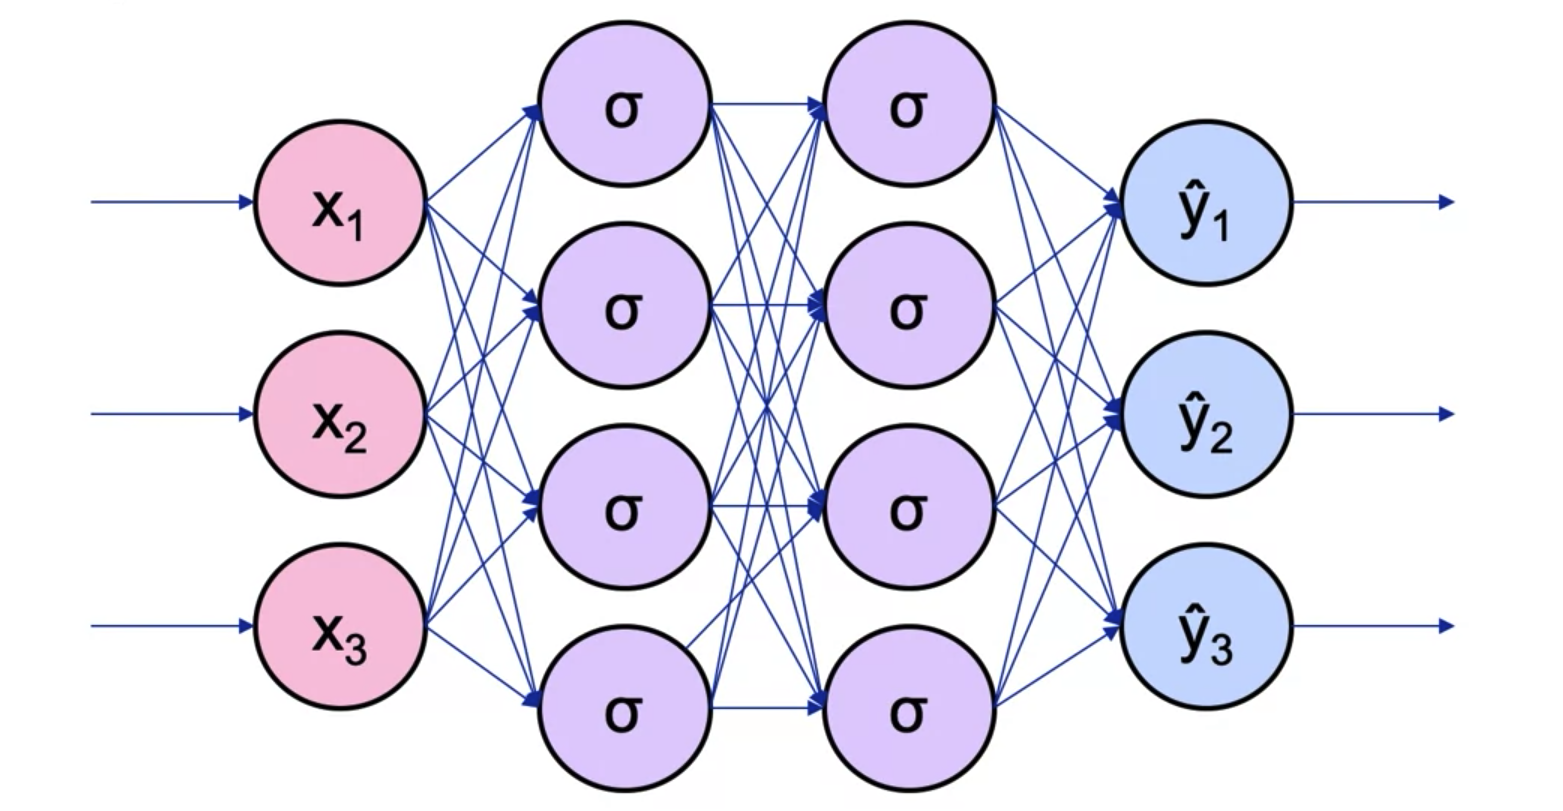
<div/>

```python

# import sequential function and initialize the model object
from keras.models import Sequential

model = Sequential()

## Then add layers to the model one by one (Dense layers are fully connected layers)
from keras.layers import Dense, Activation

# for the first layer, specify the input dimension
model.add(Dense(units=4, input_dim=3))

# specify activation function
model.add(Activation("sigmoid"))

# for subsequent layers, the input dimension is presumed from the previous layer
model.add(Dense(units=4))
model.add(Activation("sigmoid"))

```

## Using Keras to Build and Train Neural Networks

In this exercise we will use a neural network to predict diabetes using the Pima Diabetes Dataset.  We will start by training a Random Forest to get a performance baseline.  Then we will use the Keras package to quickly build and train a neural network and compare the performance.  We will see how different network structures affect the performance, training time, and level of overfitting (or underfitting).

## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.

In [1]:
#Setup
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
## Import Keras objects for Deep Learning
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [5]:
## Load in the data set 
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('diabetes.csv', names=names, header=0)

In [6]:
# Take a peek at the data -- if there are lots of "NaN" you may have internet connectivity issues
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
208,1,96,64,27,87,33.2,0.289,21,0
485,0,135,68,42,250,42.3,0.365,24,1
466,0,74,52,10,36,27.8,0.269,22,0
136,0,100,70,26,50,30.8,0.597,21,0
407,0,101,62,0,0,21.9,0.336,25,0


In [7]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

In [8]:
# Split the data to Train, and Test (75%, 25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [9]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Above, we see that about 35% of the patients in this dataset have diabetes, while 65% do not.  This means we can get an accuracy of 65% without any model - just declare that no one has diabetes. We will calculate the ROC-AUC score to evaluate performance of our model, and also look at the accuracy as well to see if we improved upon the 65% accuracy.
## Exercise 1: Get a baseline performance using Random Forest
To begin, and get a baseline for classifier performance:


1. Train a Random Forest model with 200 trees on the training data.


2. Calculate the accuracy and roc_auc_score of the predictions.

In [10]:
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [11]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.766
roc-auc is 0.823


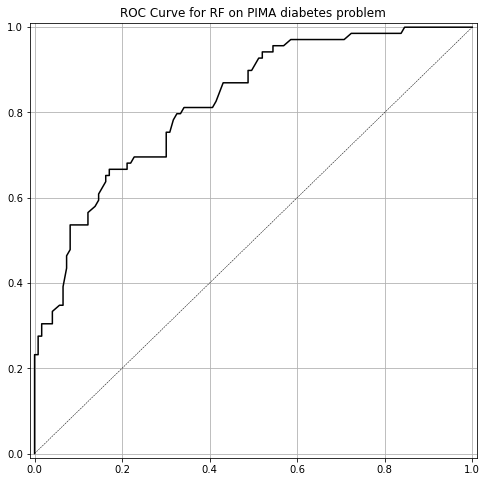

In [12]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

## Build a Single Hidden Layer Neural Network

We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 8 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 12 nodes.

In [13]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [14]:
# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (8,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

2021-09-24 20:55:34.871817: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-24 20:55:34.872201: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [15]:
#  This is a nice tool to view the model you have created and count the parameters

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### Comprehension question:
Why do we have 121 parameters?  Does that make sense?

Let's fit our model for 200 epochs.

In [16]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200) 
# pass through validation to see how we are doing on the hold out set
# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.

Train on 576 samples, validate on 192 samples
Epoch 1/200
576/576 [==============================] - 1s 3ms/sample - loss: 0.6820 - accuracy: 0.6319 - val_loss: 0.6946 - val_accuracy: 0.6042
Epoch 2/200
576/576 [==============================] - 0s 258us/sample - loss: 0.6809 - accuracy: 0.6319 - val_loss: 0.6935 - val_accuracy: 0.6094
Epoch 3/200
576/576 [==============================] - 0s 234us/sample - loss: 0.6798 - accuracy: 0.6319 - val_loss: 0.6923 - val_accuracy: 0.6094
Epoch 4/200
576/576 [==============================] - 0s 211us/sample - loss: 0.6787 - accuracy: 0.6319 - val_loss: 0.6912 - val_accuracy: 0.6094
Epoch 5/200
576/576 [==============================] - 0s 291us/sample - loss: 0.6776 - accuracy: 0.6319 - val_loss: 0.6901 - val_accuracy: 0.6094
Epoch 6/200
576/576 [==============================] - 0s 340us/sample - loss: 0.6765 - accuracy: 0.6319 - val_loss: 0.6890 - val_accuracy: 0.6094
Epoch 7/200
576/576 [==============================] - 0s 412us/sample - l

576/576 [==============================] - 0s 191us/sample - loss: 0.6307 - accuracy: 0.6476 - val_loss: 0.6435 - val_accuracy: 0.6198
Epoch 57/200
576/576 [==============================] - 0s 189us/sample - loss: 0.6299 - accuracy: 0.6458 - val_loss: 0.6427 - val_accuracy: 0.6198
Epoch 58/200
576/576 [==============================] - 0s 207us/sample - loss: 0.6292 - accuracy: 0.6476 - val_loss: 0.6419 - val_accuracy: 0.6198
Epoch 59/200
576/576 [==============================] - 0s 268us/sample - loss: 0.6284 - accuracy: 0.6476 - val_loss: 0.6412 - val_accuracy: 0.6198
Epoch 60/200
576/576 [==============================] - 0s 326us/sample - loss: 0.6276 - accuracy: 0.6476 - val_loss: 0.6404 - val_accuracy: 0.6198
Epoch 61/200
576/576 [==============================] - 0s 306us/sample - loss: 0.6269 - accuracy: 0.6458 - val_loss: 0.6397 - val_accuracy: 0.6198
Epoch 62/200
576/576 [==============================] - 0s 242us/sample - loss: 0.6261 - accuracy: 0.6458 - val_loss: 0.6389 

576/576 [==============================] - 0s 187us/sample - loss: 0.5930 - accuracy: 0.6632 - val_loss: 0.6066 - val_accuracy: 0.6667
Epoch 112/200
576/576 [==============================] - 0s 349us/sample - loss: 0.5924 - accuracy: 0.6632 - val_loss: 0.6061 - val_accuracy: 0.6719
Epoch 113/200
576/576 [==============================] - 0s 292us/sample - loss: 0.5918 - accuracy: 0.6649 - val_loss: 0.6055 - val_accuracy: 0.6771
Epoch 114/200
576/576 [==============================] - 0s 169us/sample - loss: 0.5912 - accuracy: 0.6649 - val_loss: 0.6049 - val_accuracy: 0.6771
Epoch 115/200
576/576 [==============================] - 0s 177us/sample - loss: 0.5906 - accuracy: 0.6667 - val_loss: 0.6043 - val_accuracy: 0.6771
Epoch 116/200
576/576 [==============================] - 0s 177us/sample - loss: 0.5900 - accuracy: 0.6684 - val_loss: 0.6038 - val_accuracy: 0.6771
Epoch 117/200
576/576 [==============================] - 0s 192us/sample - loss: 0.5894 - accuracy: 0.6684 - val_loss: 0

576/576 [==============================] - 0s 180us/sample - loss: 0.5633 - accuracy: 0.6927 - val_loss: 0.5781 - val_accuracy: 0.7188
Epoch 167/200
576/576 [==============================] - 0s 173us/sample - loss: 0.5628 - accuracy: 0.6927 - val_loss: 0.5776 - val_accuracy: 0.7188
Epoch 168/200
576/576 [==============================] - 0s 291us/sample - loss: 0.5623 - accuracy: 0.6927 - val_loss: 0.5772 - val_accuracy: 0.7188
Epoch 169/200
576/576 [==============================] - 0s 316us/sample - loss: 0.5619 - accuracy: 0.6927 - val_loss: 0.5767 - val_accuracy: 0.7188
Epoch 170/200
576/576 [==============================] - 0s 202us/sample - loss: 0.5614 - accuracy: 0.6944 - val_loss: 0.5763 - val_accuracy: 0.7188
Epoch 171/200
576/576 [==============================] - 0s 286us/sample - loss: 0.5609 - accuracy: 0.6944 - val_loss: 0.5758 - val_accuracy: 0.7188
Epoch 172/200
576/576 [==============================] - 0s 169us/sample - loss: 0.5604 - accuracy: 0.6944 - val_loss: 0

In [17]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [18]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [19]:
y_pred_prob_nn_1[:10]

array([[0.35276127],
       [0.554247  ],
       [0.38110617],
       [0.3835563 ],
       [0.26292992],
       [0.41644976],
       [0.2269462 ],
       [0.36370212],
       [0.6094235 ],
       [0.24962696]], dtype=float32)

accuracy is 0.729
roc-auc is 0.772


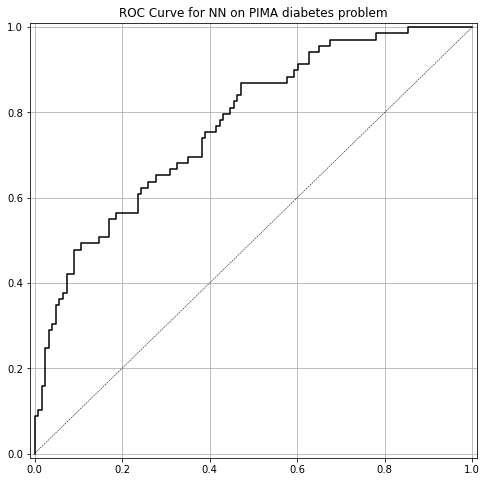

In [20]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

There may be some variation in exact numbers due to randomness, but you should get results in the same ballpark as the Random Forest - between 75% and 85% accuracy, between .8 and .9 for AUC.

Let's look at the `run_hist_1` object that was created, specifically its `history` attribute.

In [21]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's plot the training loss and the validation loss over the different epochs and see how it looks.

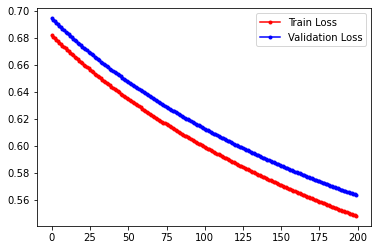

In [24]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()

#### Model Improvement by Increasing number of Epochs

Looks like the losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.  Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.

In [25]:
## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 0s 435us/sample - loss: 0.5476 - accuracy: 0.7101 - val_loss: 0.5631 - val_accuracy: 0.7292
Epoch 2/1000
576/576 [==============================] - 0s 251us/sample - loss: 0.5471 - accuracy: 0.7101 - val_loss: 0.5627 - val_accuracy: 0.7292
Epoch 3/1000
576/576 [==============================] - 0s 248us/sample - loss: 0.5467 - accuracy: 0.7118 - val_loss: 0.5623 - val_accuracy: 0.7292
Epoch 4/1000
576/576 [==============================] - 0s 220us/sample - loss: 0.5463 - accuracy: 0.7118 - val_loss: 0.5619 - val_accuracy: 0.7292
Epoch 5/1000
576/576 [==============================] - 0s 217us/sample - loss: 0.5459 - accuracy: 0.7135 - val_loss: 0.5615 - val_accuracy: 0.7292
Epoch 6/1000
576/576 [==============================] - 0s 230us/sample - loss: 0.5455 - accuracy: 0.7135 - val_loss: 0.5611 - val_accuracy: 0.7292
Epoch 7/1000
576/576 [==============================] - 0s 369us/s

Epoch 56/1000
576/576 [==============================] - 0s 530us/sample - loss: 0.5270 - accuracy: 0.7344 - val_loss: 0.5436 - val_accuracy: 0.7552
Epoch 57/1000
576/576 [==============================] - 0s 444us/sample - loss: 0.5267 - accuracy: 0.7344 - val_loss: 0.5433 - val_accuracy: 0.7552
Epoch 58/1000
576/576 [==============================] - 0s 354us/sample - loss: 0.5264 - accuracy: 0.7344 - val_loss: 0.5430 - val_accuracy: 0.7552
Epoch 59/1000
576/576 [==============================] - 0s 389us/sample - loss: 0.5260 - accuracy: 0.7344 - val_loss: 0.5427 - val_accuracy: 0.7552
Epoch 60/1000
576/576 [==============================] - 0s 654us/sample - loss: 0.5257 - accuracy: 0.7361 - val_loss: 0.5424 - val_accuracy: 0.7552
Epoch 61/1000
576/576 [==============================] - 0s 433us/sample - loss: 0.5254 - accuracy: 0.7378 - val_loss: 0.5421 - val_accuracy: 0.7552
Epoch 62/1000
576/576 [==============================] - 0s 416us/sample - loss: 0.5250 - accuracy: 0.7378

Epoch 111/1000
576/576 [==============================] - 0s 308us/sample - loss: 0.5108 - accuracy: 0.7517 - val_loss: 0.5286 - val_accuracy: 0.7604
Epoch 112/1000
576/576 [==============================] - 0s 183us/sample - loss: 0.5106 - accuracy: 0.7517 - val_loss: 0.5283 - val_accuracy: 0.7604
Epoch 113/1000
576/576 [==============================] - 0s 187us/sample - loss: 0.5103 - accuracy: 0.7517 - val_loss: 0.5281 - val_accuracy: 0.7604
Epoch 114/1000
576/576 [==============================] - 0s 392us/sample - loss: 0.5101 - accuracy: 0.7517 - val_loss: 0.5279 - val_accuracy: 0.7604
Epoch 115/1000
576/576 [==============================] - 0s 269us/sample - loss: 0.5098 - accuracy: 0.7517 - val_loss: 0.5276 - val_accuracy: 0.7604
Epoch 116/1000
576/576 [==============================] - 0s 294us/sample - loss: 0.5096 - accuracy: 0.7517 - val_loss: 0.5274 - val_accuracy: 0.7604
Epoch 117/1000
576/576 [==============================] - 0s 227us/sample - loss: 0.5093 - accuracy:

576/576 [==============================] - 0s 365us/sample - loss: 0.4986 - accuracy: 0.7587 - val_loss: 0.5173 - val_accuracy: 0.7552
Epoch 166/1000
576/576 [==============================] - 0s 257us/sample - loss: 0.4983 - accuracy: 0.7587 - val_loss: 0.5172 - val_accuracy: 0.7552
Epoch 167/1000
576/576 [==============================] - 0s 231us/sample - loss: 0.4982 - accuracy: 0.7604 - val_loss: 0.5170 - val_accuracy: 0.7552
Epoch 168/1000
576/576 [==============================] - 0s 563us/sample - loss: 0.4980 - accuracy: 0.7604 - val_loss: 0.5168 - val_accuracy: 0.7552
Epoch 169/1000
576/576 [==============================] - 0s 320us/sample - loss: 0.4978 - accuracy: 0.7604 - val_loss: 0.5166 - val_accuracy: 0.7552
Epoch 170/1000
576/576 [==============================] - 0s 229us/sample - loss: 0.4976 - accuracy: 0.7622 - val_loss: 0.5165 - val_accuracy: 0.7552
Epoch 171/1000
576/576 [==============================] - 0s 251us/sample - loss: 0.4974 - accuracy: 0.7622 - val_l

Epoch 220/1000
576/576 [==============================] - 0s 245us/sample - loss: 0.4890 - accuracy: 0.7622 - val_loss: 0.5088 - val_accuracy: 0.7552
Epoch 221/1000
576/576 [==============================] - 0s 239us/sample - loss: 0.4888 - accuracy: 0.7622 - val_loss: 0.5087 - val_accuracy: 0.7552
Epoch 222/1000
576/576 [==============================] - 0s 311us/sample - loss: 0.4886 - accuracy: 0.7622 - val_loss: 0.5085 - val_accuracy: 0.7552
Epoch 223/1000
576/576 [==============================] - 0s 299us/sample - loss: 0.4885 - accuracy: 0.7622 - val_loss: 0.5084 - val_accuracy: 0.7552
Epoch 224/1000
576/576 [==============================] - 0s 226us/sample - loss: 0.4883 - accuracy: 0.7622 - val_loss: 0.5083 - val_accuracy: 0.7552
Epoch 225/1000
576/576 [==============================] - 0s 263us/sample - loss: 0.4882 - accuracy: 0.7622 - val_loss: 0.5081 - val_accuracy: 0.7552
Epoch 226/1000
576/576 [==============================] - 0s 591us/sample - loss: 0.4881 - accuracy:

576/576 [==============================] - 0s 376us/sample - loss: 0.4818 - accuracy: 0.7656 - val_loss: 0.5026 - val_accuracy: 0.7604
Epoch 275/1000
576/576 [==============================] - 0s 528us/sample - loss: 0.4816 - accuracy: 0.7656 - val_loss: 0.5025 - val_accuracy: 0.7604
Epoch 276/1000
576/576 [==============================] - 0s 291us/sample - loss: 0.4815 - accuracy: 0.7656 - val_loss: 0.5024 - val_accuracy: 0.7604
Epoch 277/1000
576/576 [==============================] - 0s 245us/sample - loss: 0.4814 - accuracy: 0.7656 - val_loss: 0.5023 - val_accuracy: 0.7604
Epoch 278/1000
576/576 [==============================] - 0s 240us/sample - loss: 0.4813 - accuracy: 0.7656 - val_loss: 0.5022 - val_accuracy: 0.7604
Epoch 279/1000
576/576 [==============================] - 0s 177us/sample - loss: 0.4812 - accuracy: 0.7656 - val_loss: 0.5021 - val_accuracy: 0.7604
Epoch 280/1000
576/576 [==============================] - 0s 212us/sample - loss: 0.4811 - accuracy: 0.7656 - val_l

Epoch 329/1000
576/576 [==============================] - 0s 272us/sample - loss: 0.4762 - accuracy: 0.7726 - val_loss: 0.4979 - val_accuracy: 0.7500
Epoch 330/1000
576/576 [==============================] - 0s 305us/sample - loss: 0.4761 - accuracy: 0.7708 - val_loss: 0.4979 - val_accuracy: 0.7500
Epoch 331/1000
576/576 [==============================] - 0s 276us/sample - loss: 0.4760 - accuracy: 0.7708 - val_loss: 0.4978 - val_accuracy: 0.7500
Epoch 332/1000
576/576 [==============================] - 0s 239us/sample - loss: 0.4759 - accuracy: 0.7726 - val_loss: 0.4977 - val_accuracy: 0.7500
Epoch 333/1000
576/576 [==============================] - 0s 712us/sample - loss: 0.4758 - accuracy: 0.7708 - val_loss: 0.4977 - val_accuracy: 0.7500
Epoch 334/1000
576/576 [==============================] - 0s 578us/sample - loss: 0.4757 - accuracy: 0.7708 - val_loss: 0.4976 - val_accuracy: 0.7500
Epoch 335/1000
576/576 [==============================] - 0s 304us/sample - loss: 0.4757 - accuracy:

Epoch 384/1000
576/576 [==============================] - 0s 500us/sample - loss: 0.4719 - accuracy: 0.7760 - val_loss: 0.4946 - val_accuracy: 0.7552
Epoch 385/1000
576/576 [==============================] - 0s 426us/sample - loss: 0.4719 - accuracy: 0.7760 - val_loss: 0.4945 - val_accuracy: 0.7552
Epoch 386/1000
576/576 [==============================] - 0s 209us/sample - loss: 0.4718 - accuracy: 0.7760 - val_loss: 0.4945 - val_accuracy: 0.7552
Epoch 387/1000
576/576 [==============================] - 0s 220us/sample - loss: 0.4717 - accuracy: 0.7760 - val_loss: 0.4944 - val_accuracy: 0.7552
Epoch 388/1000
576/576 [==============================] - 0s 197us/sample - loss: 0.4717 - accuracy: 0.7760 - val_loss: 0.4944 - val_accuracy: 0.7552
Epoch 389/1000
576/576 [==============================] - 0s 289us/sample - loss: 0.4716 - accuracy: 0.7760 - val_loss: 0.4943 - val_accuracy: 0.7552
Epoch 390/1000
576/576 [==============================] - 0s 475us/sample - loss: 0.4715 - accuracy:

576/576 [==============================] - 0s 252us/sample - loss: 0.4687 - accuracy: 0.7778 - val_loss: 0.4921 - val_accuracy: 0.7552
Epoch 439/1000
576/576 [==============================] - 0s 175us/sample - loss: 0.4687 - accuracy: 0.7778 - val_loss: 0.4921 - val_accuracy: 0.7552
Epoch 440/1000
576/576 [==============================] - 0s 263us/sample - loss: 0.4686 - accuracy: 0.7778 - val_loss: 0.4921 - val_accuracy: 0.7552
Epoch 441/1000
576/576 [==============================] - 0s 474us/sample - loss: 0.4686 - accuracy: 0.7778 - val_loss: 0.4920 - val_accuracy: 0.7552
Epoch 442/1000
576/576 [==============================] - 0s 222us/sample - loss: 0.4685 - accuracy: 0.7778 - val_loss: 0.4920 - val_accuracy: 0.7552
Epoch 443/1000
576/576 [==============================] - 0s 221us/sample - loss: 0.4685 - accuracy: 0.7778 - val_loss: 0.4919 - val_accuracy: 0.7552
Epoch 444/1000
576/576 [==============================] - 0s 254us/sample - loss: 0.4684 - accuracy: 0.7778 - val_l

Epoch 493/1000
576/576 [==============================] - 0s 155us/sample - loss: 0.4662 - accuracy: 0.7778 - val_loss: 0.4903 - val_accuracy: 0.7500
Epoch 494/1000
576/576 [==============================] - 0s 145us/sample - loss: 0.4661 - accuracy: 0.7778 - val_loss: 0.4903 - val_accuracy: 0.7500
Epoch 495/1000
576/576 [==============================] - 0s 774us/sample - loss: 0.4661 - accuracy: 0.7778 - val_loss: 0.4903 - val_accuracy: 0.7500
Epoch 496/1000
576/576 [==============================] - 0s 279us/sample - loss: 0.4661 - accuracy: 0.7778 - val_loss: 0.4903 - val_accuracy: 0.7500
Epoch 497/1000
576/576 [==============================] - 0s 280us/sample - loss: 0.4660 - accuracy: 0.7778 - val_loss: 0.4902 - val_accuracy: 0.7500
Epoch 498/1000
576/576 [==============================] - 0s 656us/sample - loss: 0.4660 - accuracy: 0.7778 - val_loss: 0.4902 - val_accuracy: 0.7500
Epoch 499/1000
576/576 [==============================] - 0s 764us/sample - loss: 0.4659 - accuracy:

576/576 [==============================] - 0s 151us/sample - loss: 0.4642 - accuracy: 0.7743 - val_loss: 0.4891 - val_accuracy: 0.7552
Epoch 548/1000
576/576 [==============================] - 0s 152us/sample - loss: 0.4642 - accuracy: 0.7743 - val_loss: 0.4890 - val_accuracy: 0.7552
Epoch 549/1000
576/576 [==============================] - 0s 201us/sample - loss: 0.4642 - accuracy: 0.7743 - val_loss: 0.4890 - val_accuracy: 0.7552
Epoch 550/1000
576/576 [==============================] - 0s 313us/sample - loss: 0.4641 - accuracy: 0.7743 - val_loss: 0.4890 - val_accuracy: 0.7552
Epoch 551/1000
576/576 [==============================] - 0s 230us/sample - loss: 0.4641 - accuracy: 0.7743 - val_loss: 0.4890 - val_accuracy: 0.7552
Epoch 552/1000
576/576 [==============================] - 0s 144us/sample - loss: 0.4641 - accuracy: 0.7743 - val_loss: 0.4890 - val_accuracy: 0.7552
Epoch 553/1000
576/576 [==============================] - 0s 154us/sample - loss: 0.4641 - accuracy: 0.7743 - val_l

Epoch 602/1000
576/576 [==============================] - 0s 159us/sample - loss: 0.4627 - accuracy: 0.7760 - val_loss: 0.4881 - val_accuracy: 0.7552
Epoch 603/1000
576/576 [==============================] - 0s 205us/sample - loss: 0.4626 - accuracy: 0.7760 - val_loss: 0.4881 - val_accuracy: 0.7552
Epoch 604/1000
576/576 [==============================] - 0s 150us/sample - loss: 0.4626 - accuracy: 0.7760 - val_loss: 0.4881 - val_accuracy: 0.7552
Epoch 605/1000
576/576 [==============================] - 0s 153us/sample - loss: 0.4626 - accuracy: 0.7760 - val_loss: 0.4881 - val_accuracy: 0.7552
Epoch 606/1000
576/576 [==============================] - 0s 164us/sample - loss: 0.4626 - accuracy: 0.7760 - val_loss: 0.4881 - val_accuracy: 0.7552
Epoch 607/1000
576/576 [==============================] - 0s 133us/sample - loss: 0.4626 - accuracy: 0.7760 - val_loss: 0.4880 - val_accuracy: 0.7552
Epoch 608/1000
576/576 [==============================] - 0s 137us/sample - loss: 0.4625 - accuracy:

576/576 [==============================] - 0s 229us/sample - loss: 0.4614 - accuracy: 0.7760 - val_loss: 0.4874 - val_accuracy: 0.7500
Epoch 657/1000
576/576 [==============================] - 0s 171us/sample - loss: 0.4614 - accuracy: 0.7760 - val_loss: 0.4874 - val_accuracy: 0.7500
Epoch 658/1000
576/576 [==============================] - 0s 172us/sample - loss: 0.4614 - accuracy: 0.7760 - val_loss: 0.4874 - val_accuracy: 0.7500
Epoch 659/1000
576/576 [==============================] - 0s 171us/sample - loss: 0.4614 - accuracy: 0.7760 - val_loss: 0.4874 - val_accuracy: 0.7500
Epoch 660/1000
576/576 [==============================] - 0s 169us/sample - loss: 0.4613 - accuracy: 0.7760 - val_loss: 0.4874 - val_accuracy: 0.7500
Epoch 661/1000
576/576 [==============================] - 0s 236us/sample - loss: 0.4613 - accuracy: 0.7778 - val_loss: 0.4874 - val_accuracy: 0.7500
Epoch 662/1000
576/576 [==============================] - 0s 457us/sample - loss: 0.4613 - accuracy: 0.7778 - val_l

Epoch 711/1000
576/576 [==============================] - 0s 257us/sample - loss: 0.4604 - accuracy: 0.7795 - val_loss: 0.4870 - val_accuracy: 0.7500
Epoch 712/1000
576/576 [==============================] - 0s 228us/sample - loss: 0.4604 - accuracy: 0.7795 - val_loss: 0.4869 - val_accuracy: 0.7500
Epoch 713/1000
576/576 [==============================] - 0s 155us/sample - loss: 0.4604 - accuracy: 0.7795 - val_loss: 0.4869 - val_accuracy: 0.7500
Epoch 714/1000
576/576 [==============================] - 0s 173us/sample - loss: 0.4604 - accuracy: 0.7795 - val_loss: 0.4869 - val_accuracy: 0.7500
Epoch 715/1000
576/576 [==============================] - 0s 189us/sample - loss: 0.4604 - accuracy: 0.7795 - val_loss: 0.4869 - val_accuracy: 0.7500
Epoch 716/1000
576/576 [==============================] - 0s 506us/sample - loss: 0.4604 - accuracy: 0.7795 - val_loss: 0.4869 - val_accuracy: 0.7500
Epoch 717/1000
576/576 [==============================] - 0s 253us/sample - loss: 0.4603 - accuracy:

576/576 [==============================] - 0s 298us/sample - loss: 0.4596 - accuracy: 0.7778 - val_loss: 0.4866 - val_accuracy: 0.7500
Epoch 766/1000
576/576 [==============================] - 0s 272us/sample - loss: 0.4596 - accuracy: 0.7778 - val_loss: 0.4866 - val_accuracy: 0.7500
Epoch 767/1000
576/576 [==============================] - 0s 169us/sample - loss: 0.4596 - accuracy: 0.7778 - val_loss: 0.4866 - val_accuracy: 0.7500
Epoch 768/1000
576/576 [==============================] - 0s 166us/sample - loss: 0.4596 - accuracy: 0.7778 - val_loss: 0.4866 - val_accuracy: 0.7500
Epoch 769/1000
576/576 [==============================] - 0s 173us/sample - loss: 0.4596 - accuracy: 0.7795 - val_loss: 0.4866 - val_accuracy: 0.7500
Epoch 770/1000
576/576 [==============================] - 0s 165us/sample - loss: 0.4595 - accuracy: 0.7778 - val_loss: 0.4866 - val_accuracy: 0.7500
Epoch 771/1000
576/576 [==============================] - 0s 143us/sample - loss: 0.4595 - accuracy: 0.7778 - val_l

Epoch 820/1000
576/576 [==============================] - 0s 188us/sample - loss: 0.4589 - accuracy: 0.7812 - val_loss: 0.4864 - val_accuracy: 0.7552
Epoch 821/1000
576/576 [==============================] - 0s 144us/sample - loss: 0.4589 - accuracy: 0.7812 - val_loss: 0.4864 - val_accuracy: 0.7552
Epoch 822/1000
576/576 [==============================] - 0s 159us/sample - loss: 0.4589 - accuracy: 0.7812 - val_loss: 0.4864 - val_accuracy: 0.7552
Epoch 823/1000
576/576 [==============================] - 0s 339us/sample - loss: 0.4589 - accuracy: 0.7812 - val_loss: 0.4864 - val_accuracy: 0.7552
Epoch 824/1000
576/576 [==============================] - 0s 216us/sample - loss: 0.4589 - accuracy: 0.7812 - val_loss: 0.4863 - val_accuracy: 0.7552
Epoch 825/1000
576/576 [==============================] - 0s 150us/sample - loss: 0.4588 - accuracy: 0.7812 - val_loss: 0.4863 - val_accuracy: 0.7552
Epoch 826/1000
576/576 [==============================] - 0s 184us/sample - loss: 0.4588 - accuracy:

576/576 [==============================] - 0s 177us/sample - loss: 0.4583 - accuracy: 0.7812 - val_loss: 0.4862 - val_accuracy: 0.7552
Epoch 875/1000
576/576 [==============================] - 0s 208us/sample - loss: 0.4583 - accuracy: 0.7812 - val_loss: 0.4862 - val_accuracy: 0.7552
Epoch 876/1000
576/576 [==============================] - 0s 188us/sample - loss: 0.4583 - accuracy: 0.7812 - val_loss: 0.4862 - val_accuracy: 0.7552
Epoch 877/1000
576/576 [==============================] - 0s 183us/sample - loss: 0.4583 - accuracy: 0.7812 - val_loss: 0.4862 - val_accuracy: 0.7552
Epoch 878/1000
576/576 [==============================] - 0s 242us/sample - loss: 0.4583 - accuracy: 0.7812 - val_loss: 0.4862 - val_accuracy: 0.7552
Epoch 879/1000
576/576 [==============================] - 0s 174us/sample - loss: 0.4583 - accuracy: 0.7812 - val_loss: 0.4862 - val_accuracy: 0.7552
Epoch 880/1000
576/576 [==============================] - 0s 241us/sample - loss: 0.4583 - accuracy: 0.7812 - val_l

Epoch 929/1000
576/576 [==============================] - 0s 151us/sample - loss: 0.4578 - accuracy: 0.7795 - val_loss: 0.4861 - val_accuracy: 0.7500
Epoch 930/1000
576/576 [==============================] - 0s 148us/sample - loss: 0.4578 - accuracy: 0.7795 - val_loss: 0.4861 - val_accuracy: 0.7500
Epoch 931/1000
576/576 [==============================] - 0s 157us/sample - loss: 0.4578 - accuracy: 0.7795 - val_loss: 0.4861 - val_accuracy: 0.7500
Epoch 932/1000
576/576 [==============================] - 0s 161us/sample - loss: 0.4578 - accuracy: 0.7795 - val_loss: 0.4861 - val_accuracy: 0.7500
Epoch 933/1000
576/576 [==============================] - 0s 157us/sample - loss: 0.4578 - accuracy: 0.7795 - val_loss: 0.4861 - val_accuracy: 0.7500
Epoch 934/1000
576/576 [==============================] - 0s 233us/sample - loss: 0.4578 - accuracy: 0.7795 - val_loss: 0.4861 - val_accuracy: 0.7500
Epoch 935/1000
576/576 [==============================] - 0s 305us/sample - loss: 0.4578 - accuracy:

576/576 [==============================] - 0s 218us/sample - loss: 0.4574 - accuracy: 0.7830 - val_loss: 0.4860 - val_accuracy: 0.7604
Epoch 984/1000
576/576 [==============================] - 0s 147us/sample - loss: 0.4574 - accuracy: 0.7830 - val_loss: 0.4860 - val_accuracy: 0.7604
Epoch 985/1000
576/576 [==============================] - 0s 165us/sample - loss: 0.4574 - accuracy: 0.7830 - val_loss: 0.4860 - val_accuracy: 0.7604
Epoch 986/1000
576/576 [==============================] - 0s 147us/sample - loss: 0.4574 - accuracy: 0.7812 - val_loss: 0.4860 - val_accuracy: 0.7604
Epoch 987/1000
576/576 [==============================] - 0s 812us/sample - loss: 0.4574 - accuracy: 0.7830 - val_loss: 0.4860 - val_accuracy: 0.7604
Epoch 988/1000
576/576 [==============================] - 0s 306us/sample - loss: 0.4574 - accuracy: 0.7812 - val_loss: 0.4860 - val_accuracy: 0.7604
Epoch 989/1000
576/576 [==============================] - 0s 161us/sample - loss: 0.4573 - accuracy: 0.7830 - val_l

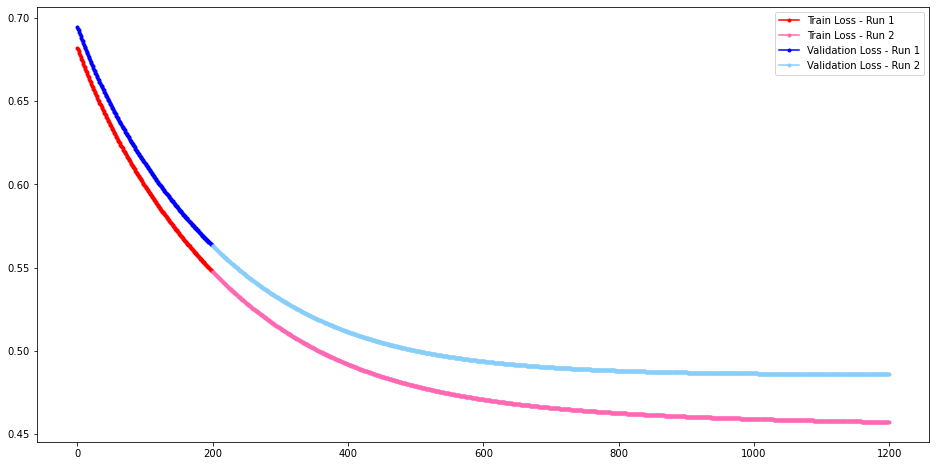

In [26]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

Note that this graph begins where the other left off.  While the training loss is still going down, it looks like the validation loss has stabilized (or even gotten worse!).  This suggests that our network will not benefit from further training.  What is the appropriate number of epochs?

## Exercise 2
For this exercise, do the following in the cells below:
- Build a model with two hidden layers, each with 6 nodes



- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer



- Use a learning rate of .003 and train for 1500 epochs



- Graph the trajectory of the loss functions, accuracy on both train and test set



- Plot the roc curve for the predictions

Experiment with different learning rates, numbers of epochs, and network structures

In [23]:
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(8,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Train on 576 samples, validate on 192 samples
Epoch 1/1500
576/576 [==============================] - 0s 295us/step - loss: 0.6739 - accuracy: 0.5747 - val_loss: 0.6753 - val_accuracy: 0.5885
Epoch 2/1500
576/576 [==============================] - 0s 49us/step - loss: 0.6717 - accuracy: 0.5868 - val_loss: 0.6734 - val_accuracy: 0.6042
Epoch 3/1500
576/576 [==============================] - 0s 56us/step - loss: 0.6696 - accuracy: 0.5990 - val_loss: 0.6715 - val_accuracy: 0.6146
Epoch 4/1500
576/576 [==============================] - 0s 52us/step - loss: 0.6675 - accuracy: 0.6146 - val_loss: 0.6697 - val_accuracy: 0.6354
Epoch 5/1500
576/576 [==============================] - 0s 49us/step - loss: 0.6655 - accuracy: 0.6215 - val_loss: 0.6679 - val_accuracy: 0.6458
Epoch 6/1500
576/576 [==============================] - 0s 49us/step - loss: 0.6634 - accuracy: 0.6424 - val_loss: 0.6661 - val_accuracy: 0.6250
Epoch 7/1500
576/576 [==============================] - 0s 47us/step - loss: 0.6614

In [24]:
run_hist_2.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

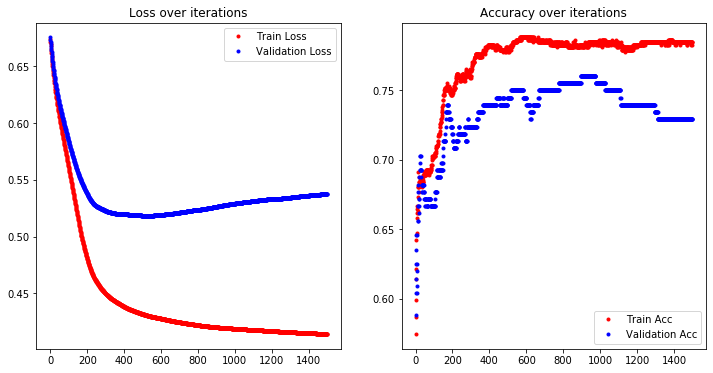

In [25]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')


accuracy is 0.729
roc-auc is 0.796


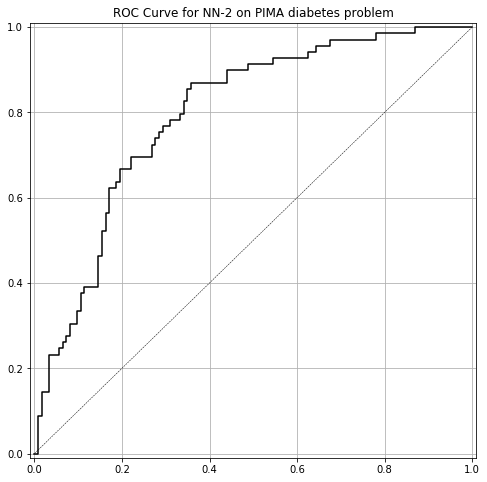

In [26]:
y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')